## Data Cleaning & Imputation

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [12]:
df = pd.read_csv('./data_kr_kz.csv', low_memory=False)
df.head()

/var/folders/km/07116vt95jj7nzdb8qzn2r5c0000gn/T/ipykernel_77920/3245401222.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data_kr_kz.csv')


,city,region,area,residental_complex,condition,views,phone_views,builder,latitude,longitude,price,rooms_amount,year,floor1,floor2,type_of_building,ceiling_height,date_of_publication
0,Нур-Султан (Астана),Есиль р-н,108.0,Promenade Expo,евроремонт,1.0,0.0,NaN,51.094539,71.427294,45000000,3,2017,6.0,7.0,монолитный,NaN,2020-08-04
1,Нур-Султан (Астана),р-н Байконур,59.0,Жар-Жар,евроремонт,1332.0,35.0,NaN,51.161597,71.457827,17300000,2,2011,13.0,15.0,кирпичный,2.7,2020-09-08
2,Алматы,Алмалинский р-н,73.0,NaN,хорошее,1.0,0.0,NaN,43.257211,76.933419,36000000,3,1980,2.0,5.0,кирпичный,NaN,2020-06-19
3,Нур-Султан (Астана),Сарыарка р-н,287.0,Европейский,черновая отделка,22.0,0.0,NaN,NaN,NaN,38000000,6,2010,18.0,19.0,монолитный,2.7,2020-05-14
4,Нур-Султан (Астана),Есиль р-н,97.2,Park Avenue Exclusive,NaN,10.0,0.0,NaN,51.100628,71.425331,62000000,3,2018,13.0,14.0,монолитный,3.0,2020-09-01


In [13]:
df.describe()

,area,views,phone_views,builder,latitude,longitude,price,rooms_amount,floor1,floor2,ceiling_height
count,810391.000000,808266.000000,808266.000000,0.0,785598.000000,785598.000000,8.104080e+05,810408.000000,789759.000000,781120.000000,321658.000000
mean,67.233947,249.297405,9.729374,NaN,46.278564,74.688467,2.939435e+07,2.243614,5.459331,9.273767,3.041798
std,39.206690,941.232721,47.739843,NaN,3.864329,2.799682,1.513826e+08,0.963202,3.993458,5.263857,2.863992
min,1.000000,0.000000,0.000000,NaN,-72.102560,-114.866147,1.000000e+00,1.000000,1.000000,1.000000,0.010000
25%,44.000000,2.000000,0.000000,NaN,43.228200,71.442556,1.690000e+07,2.000000,3.000000,5.000000,2.700000
50%,60.000000,11.000000,0.000000,NaN,43.255137,76.845000,2.300000e+07,2.000000,4.000000,9.000000,2.800000
75%,77.590000,100.000000,3.000000,NaN,51.124928,76.898742,3.200000e+07,3.000000,7.000000,12.000000,3.000000
max,7605.000000,106000.000000,13259.000000,NaN,67.673277,174.907564,7.499900e+10,9.000000,167.000000,472.000000,100.000000


In [5]:
df.isnull().sum().sort_values(ascending=False)

builder                810408
ceiling_height         488750
residental_complex     478463
condition              126794
type_of_building        78290
region                  29877
floor2                  29288
longitude               24810
latitude                24810
floor1                  20649
views                    2142
phone_views              2142
area                       17
year                        3
city                        0
rooms_amount                0
price                       0
date_of_publication         0
dtype: int64

In [21]:
for column in df.columns:
    if df[column].isnull().any():
        mode_value = df[column].mode(dropna=True)
        if not mode_value.empty:
            df[column] = df[column].fillna(mode_value.iloc[0])

In [10]:
df.isnull().sum().sort_values(ascending=False)

builder                810408
city                        0
price                       0
ceiling_height              0
type_of_building            0
floor2                      0
floor1                      0
year                        0
rooms_amount                0
longitude                   0
region                      0
latitude                    0
phone_views                 0
views                       0
condition                   0
residental_complex          0
area                        0
date_of_publication         0
dtype: int64

In [14]:
df_new = df.dropna()
df_new.isnull().sum().sort_values(ascending=False)

city                   0
region                 0
ceiling_height         0
type_of_building       0
floor2                 0
floor1                 0
year                   0
rooms_amount           0
price                  0
longitude              0
latitude               0
builder                0
phone_views            0
views                  0
condition              0
residental_complex     0
area                   0
date_of_publication    0
dtype: int64

In [28]:
df_new = df.drop(columns='builder')
df_new = df_new[df_new['city'] == 'Нур-Султан (Астана)']
df_new

,city,region,area,residental_complex,condition,views,phone_views,latitude,longitude,price,rooms_amount,year,floor1,floor2,type_of_building,ceiling_height,date_of_publication
0,Нур-Султан (Астана),Есиль р-н,108.00,Promenade Expo,евроремонт,1.0,0.0,51.094539,71.427294,45000000,3,2017,6.0,7.0,монолитный,3.0,2020-08-04
1,Нур-Султан (Астана),р-н Байконур,59.00,Жар-Жар,евроремонт,1332.0,35.0,51.161597,71.457827,17300000,2,2011,13.0,15.0,кирпичный,2.7,2020-09-08
3,Нур-Султан (Астана),Сарыарка р-н,287.00,Европейский,черновая отделка,22.0,0.0,43.206632,76.884845,38000000,6,2010,18.0,19.0,монолитный,2.7,2020-05-14
4,Нур-Султан (Астана),Есиль р-н,97.20,Park Avenue Exclusive,хорошее,10.0,0.0,51.100628,71.425331,62000000,3,2018,13.0,14.0,монолитный,3.0,2020-09-01
5,Нур-Султан (Астана),Есиль р-н,83.64,Шахристан,хорошее,0.0,0.0,51.100486,71.405550,21746400,3,2021,2.0,5.0,монолитный,3.0,2020-06-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810363,Нур-Султан (Астана),Алматы р-н,68.00,Туркестан,хорошее,30.0,3.0,51.124861,71.483709,25000000,2,2013,8.0,12.0,монолитный,2.7,2021-02-07
810364,Нур-Султан (Астана),Есиль р-н,60.00,Orynbor Towers,евроремонт,43.0,0.0,51.090125,71.426728,34000000,2,2017,7.0,22.0,монолитный,2.7,2021-02-07
810365,Нур-Султан (Астана),Алматы р-н,33.00,Шахристан,хорошее,12.0,0.0,51.145749,71.455717,14500000,1,2015,9.0,9.0,монолитный,3.0,2021-02-07
810366,Нур-Султан (Астана),р-н Байконур,31.00,Шахристан,хорошее,13.0,0.0,51.161127,71.465886,11000000,1,1967,4.0,5.0,кирпичный,3.0,2021-02-07


In [29]:
df_new.describe()

,area,views,phone_views,latitude,longitude,price,rooms_amount,floor1,floor2,ceiling_height
count,319809.000000,319809.000000,319809.000000,319809.000000,319809.000000,3.198090e+05,319809.000000,319809.000000,319809.000000,319809.000000
mean,69.026509,319.560494,13.173050,50.723084,71.704741,2.617924e+07,2.160077,6.161193,10.498407,3.038370
std,41.127184,996.234693,49.889126,1.771838,1.430840,1.308802e+08,1.010855,4.365243,5.454632,1.902772
min,2.000000,0.000000,0.000000,5.571439,-114.866147,2.000000e+00,1.000000,1.000000,1.000000,0.010000
25%,43.000000,4.000000,0.000000,51.114051,71.405186,1.450000e+07,1.000000,3.000000,6.000000,2.800000
50%,60.000000,24.000000,1.000000,51.136705,71.432396,2.000000e+07,2.000000,5.000000,9.000000,3.000000
75%,83.000000,205.000000,8.000000,51.158783,71.474599,2.850000e+07,3.000000,8.000000,13.000000,3.000000
max,2018.000000,48544.000000,8065.000000,64.664652,111.397629,4.000000e+10,9.000000,167.000000,196.000000,100.000000


## Distribution Analysis

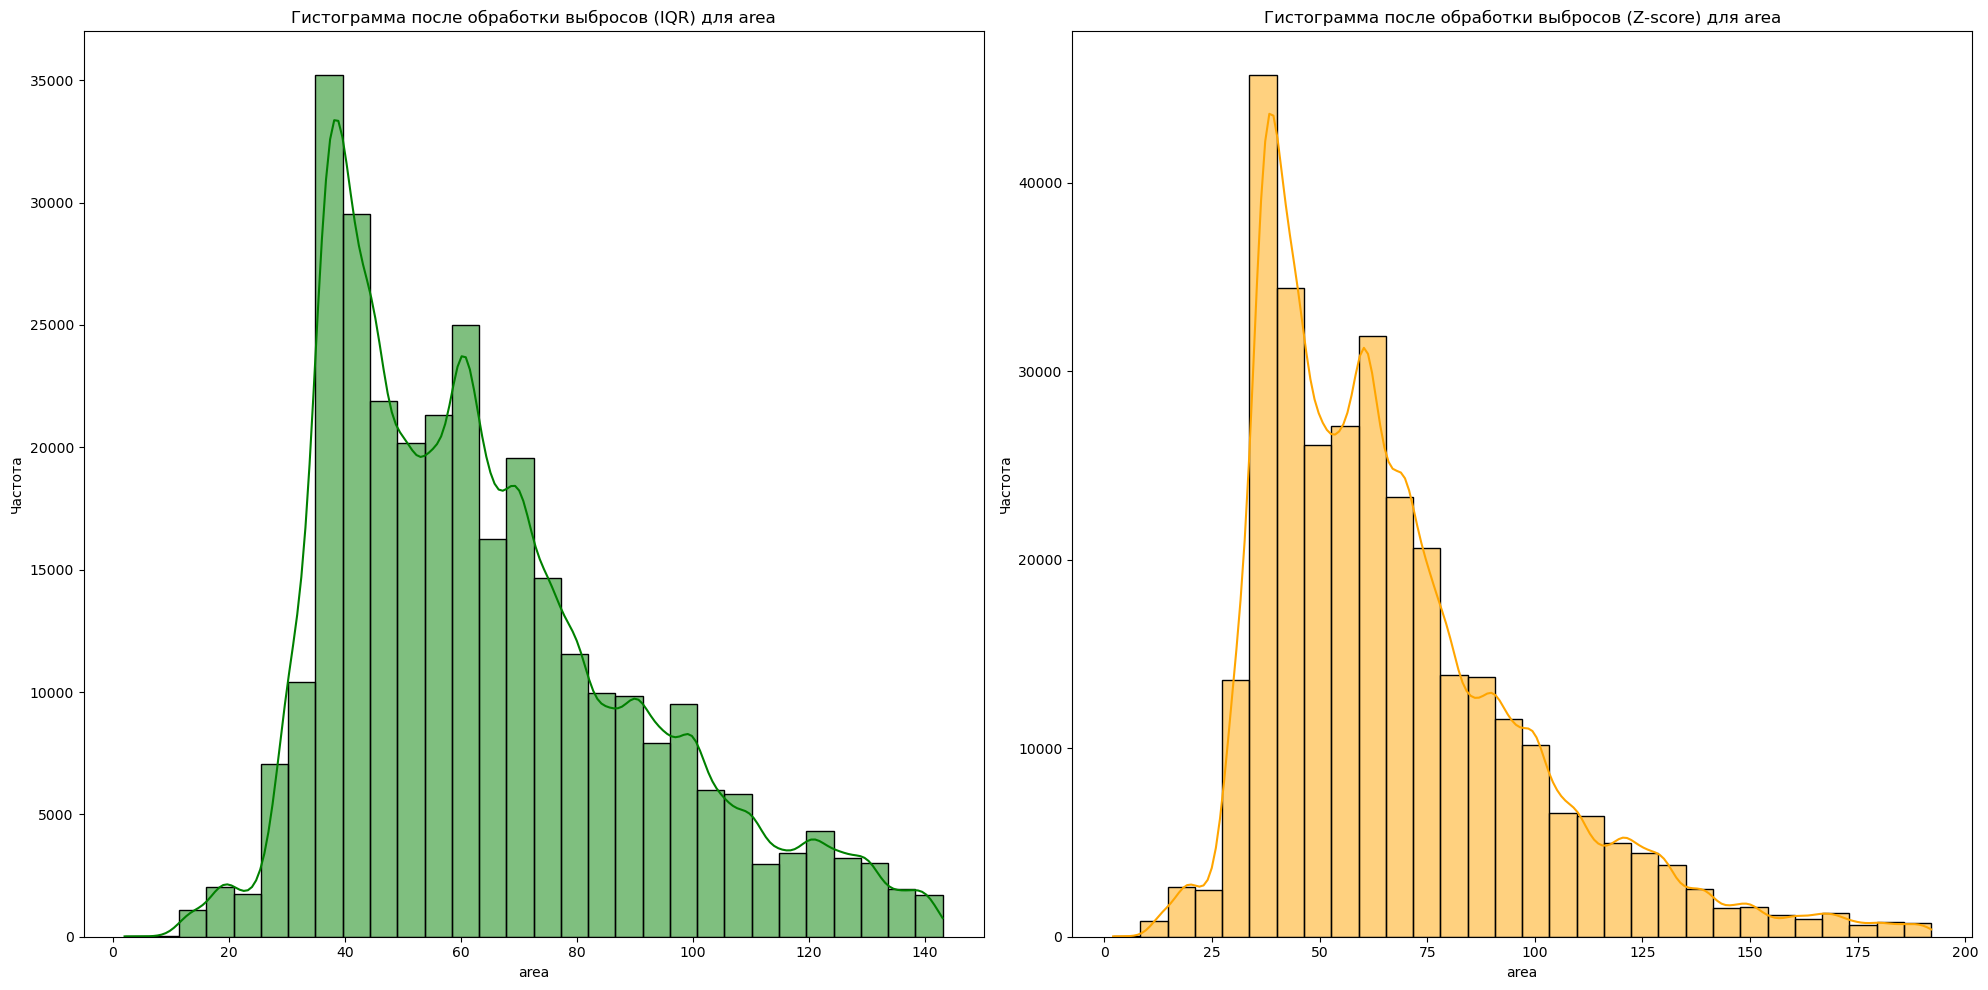

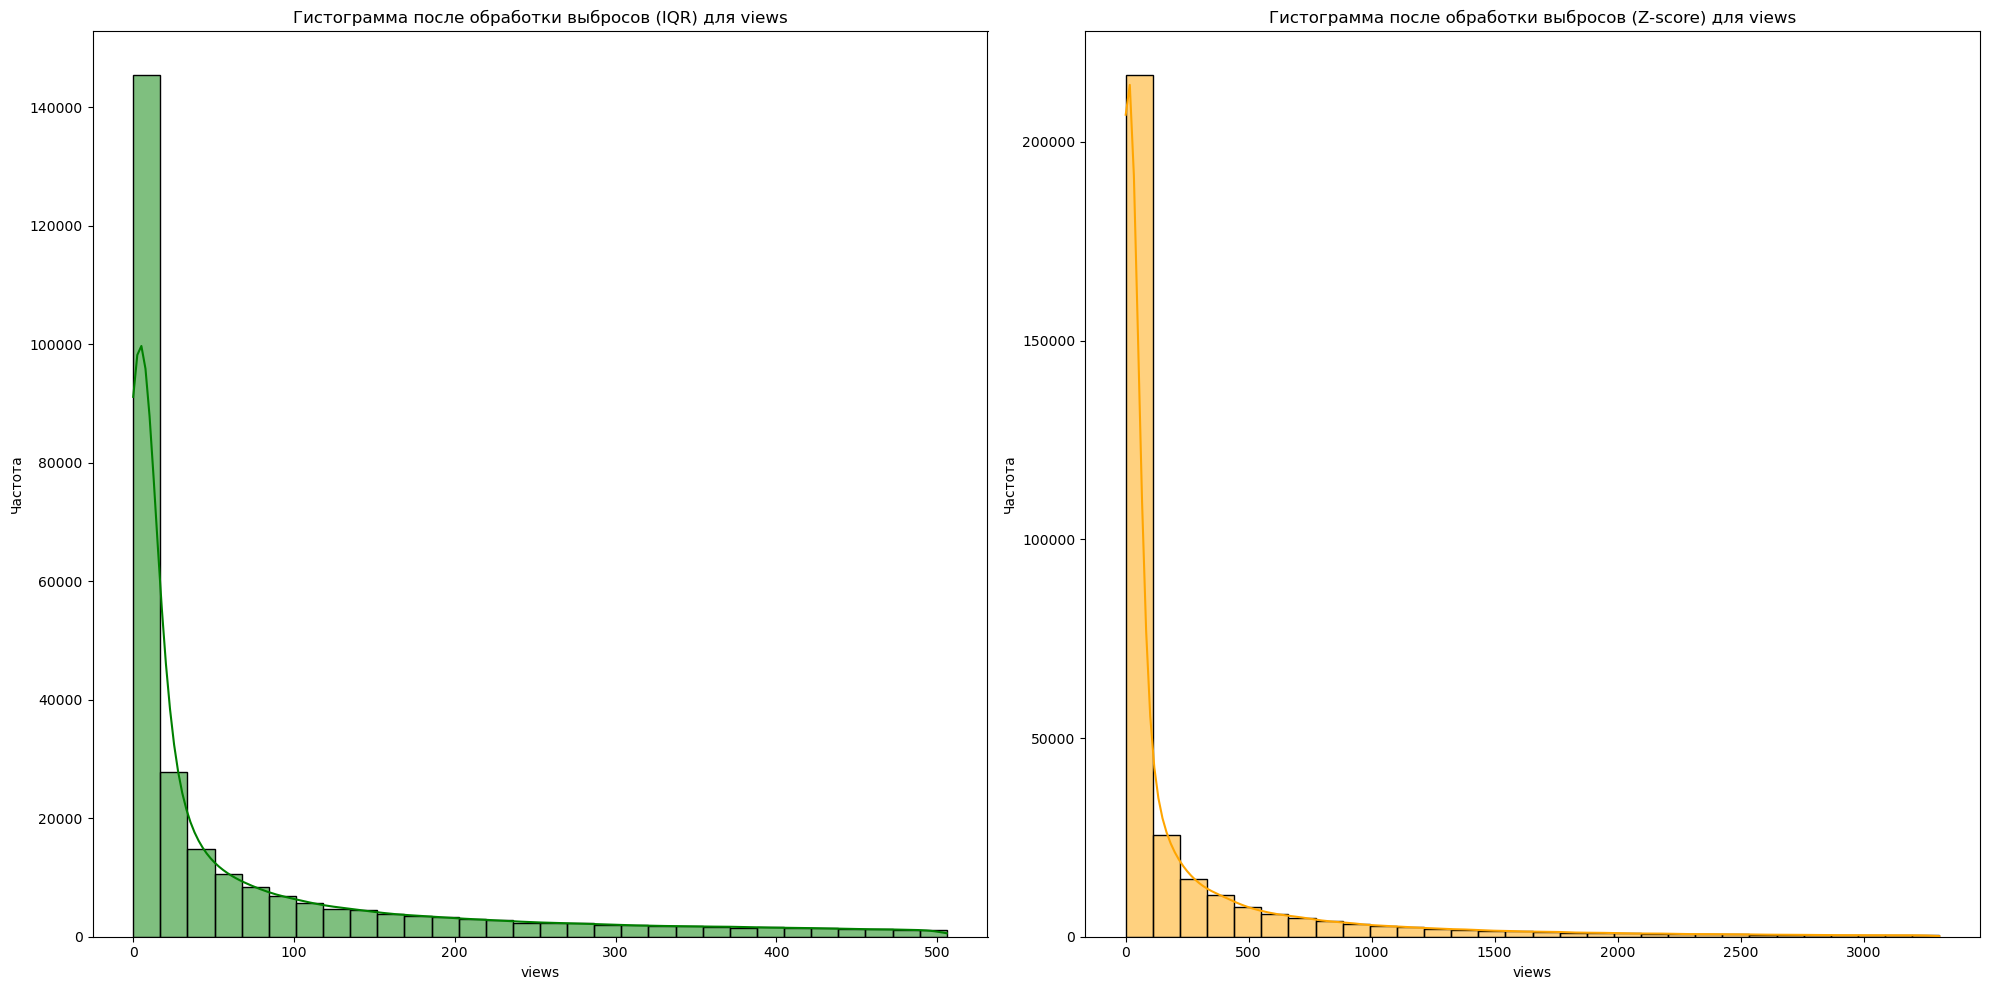

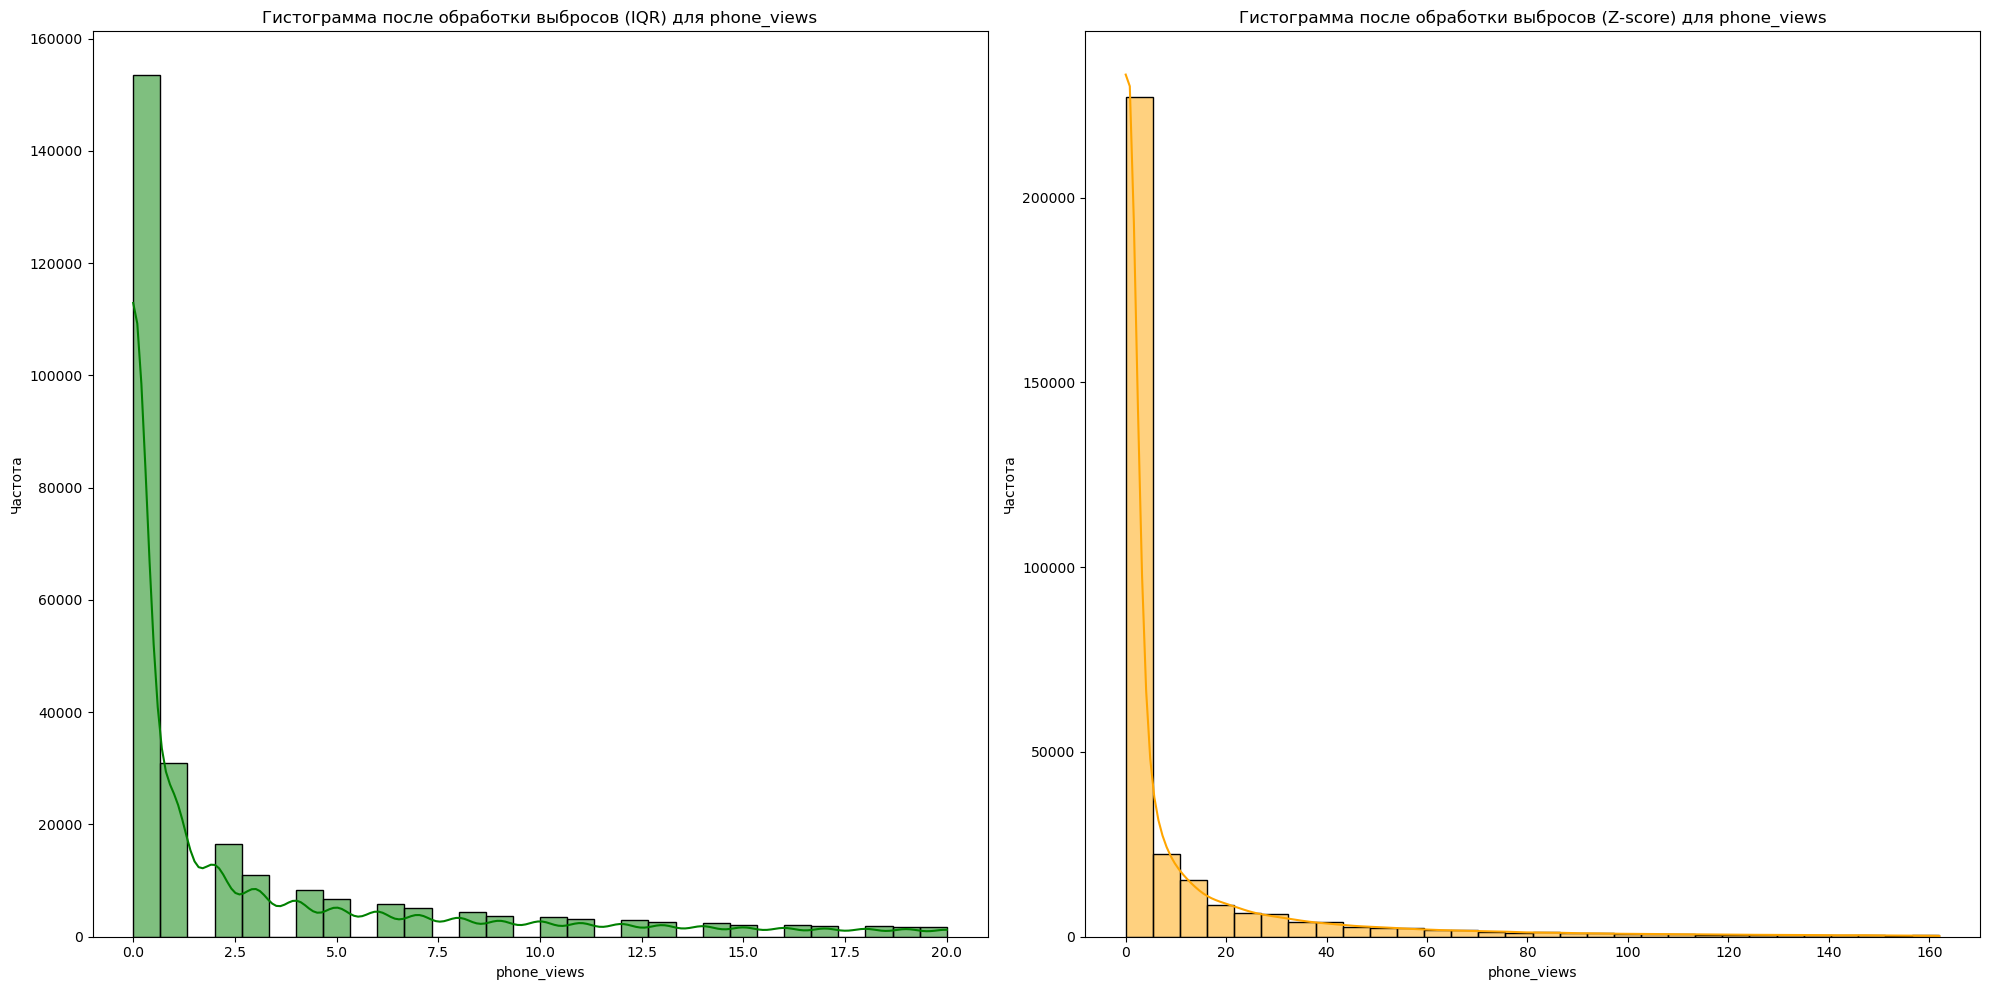

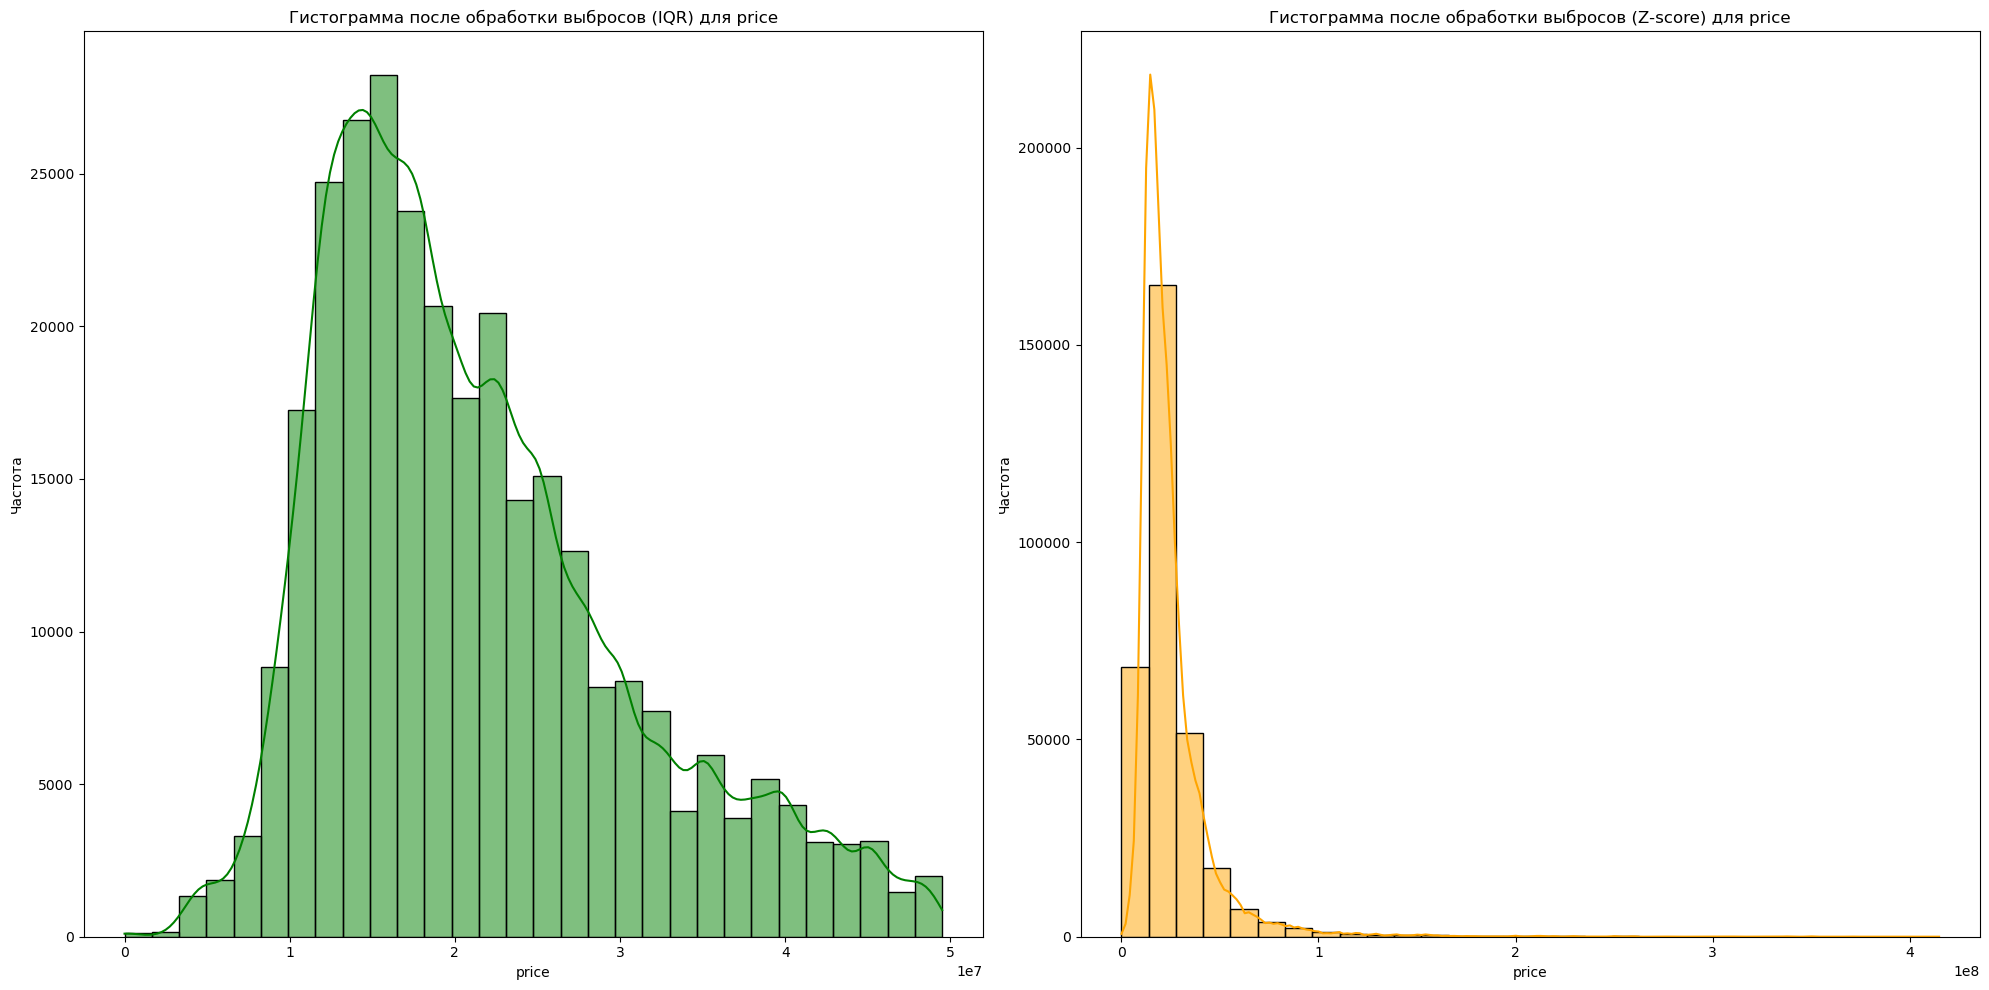

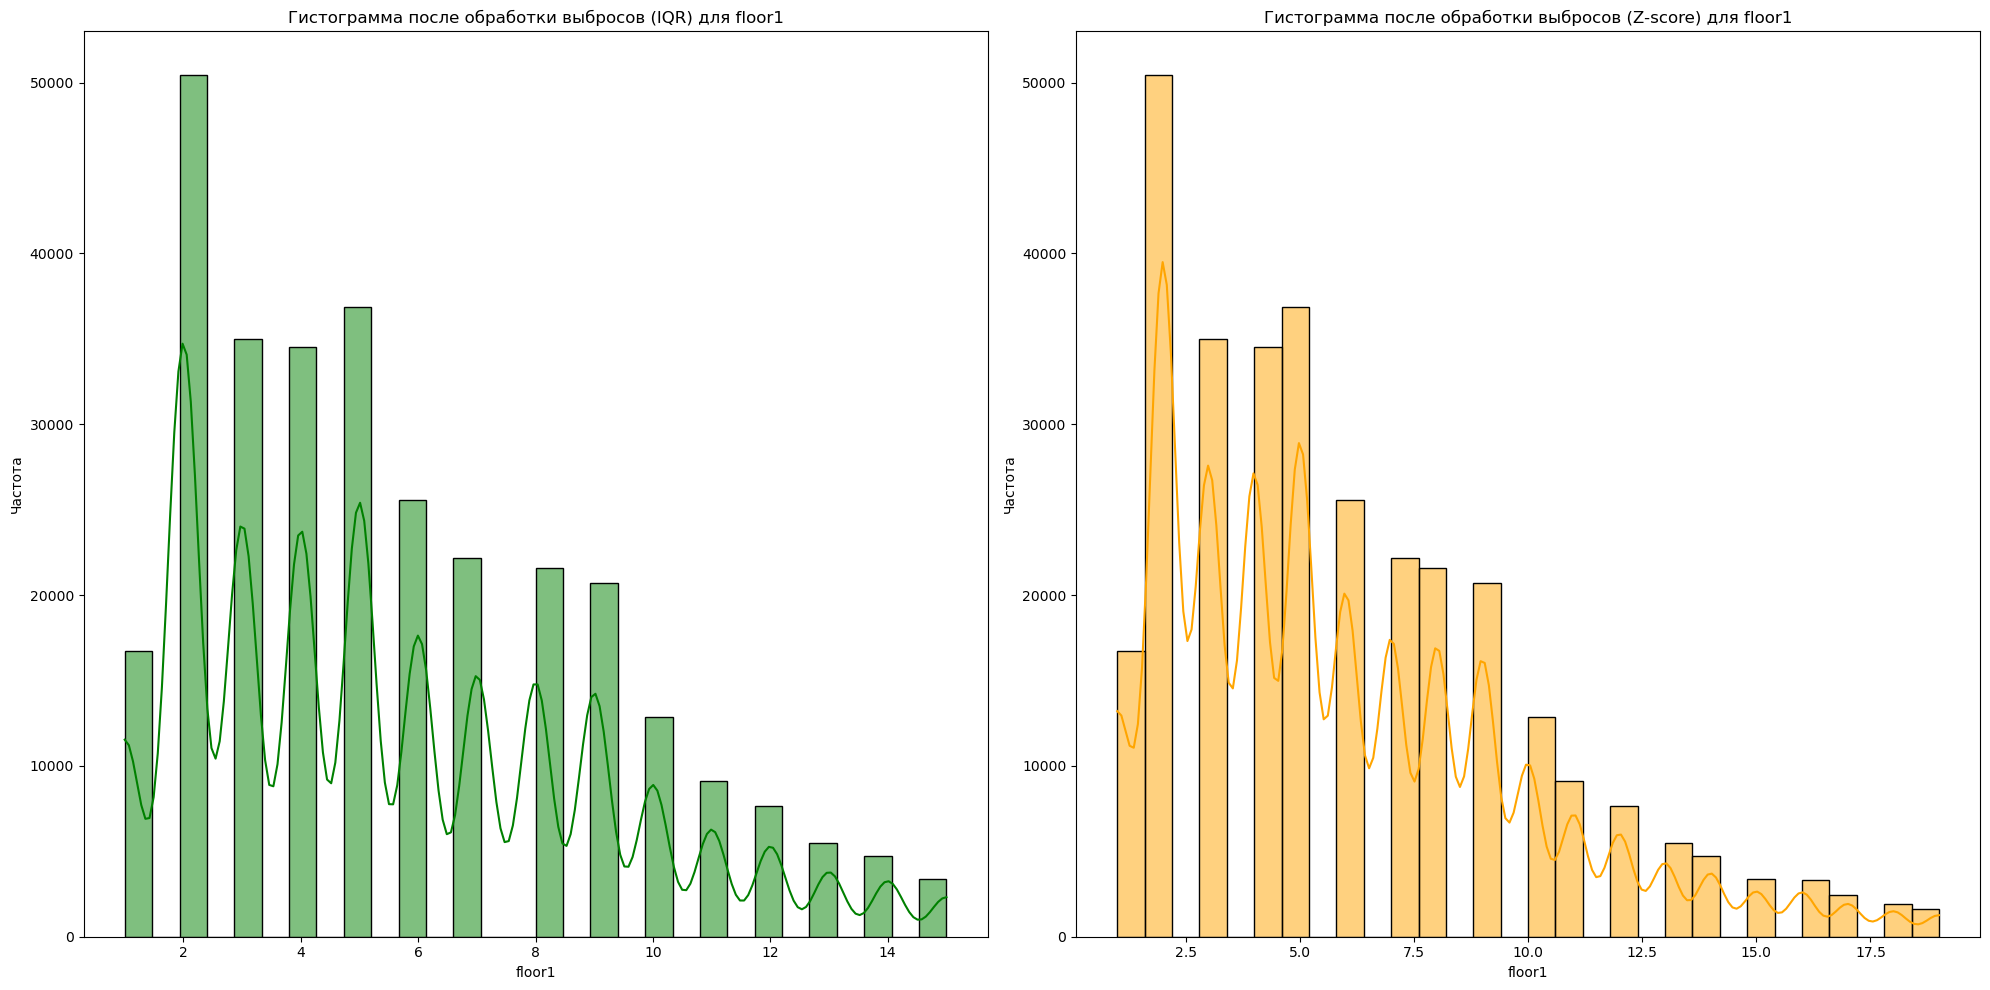

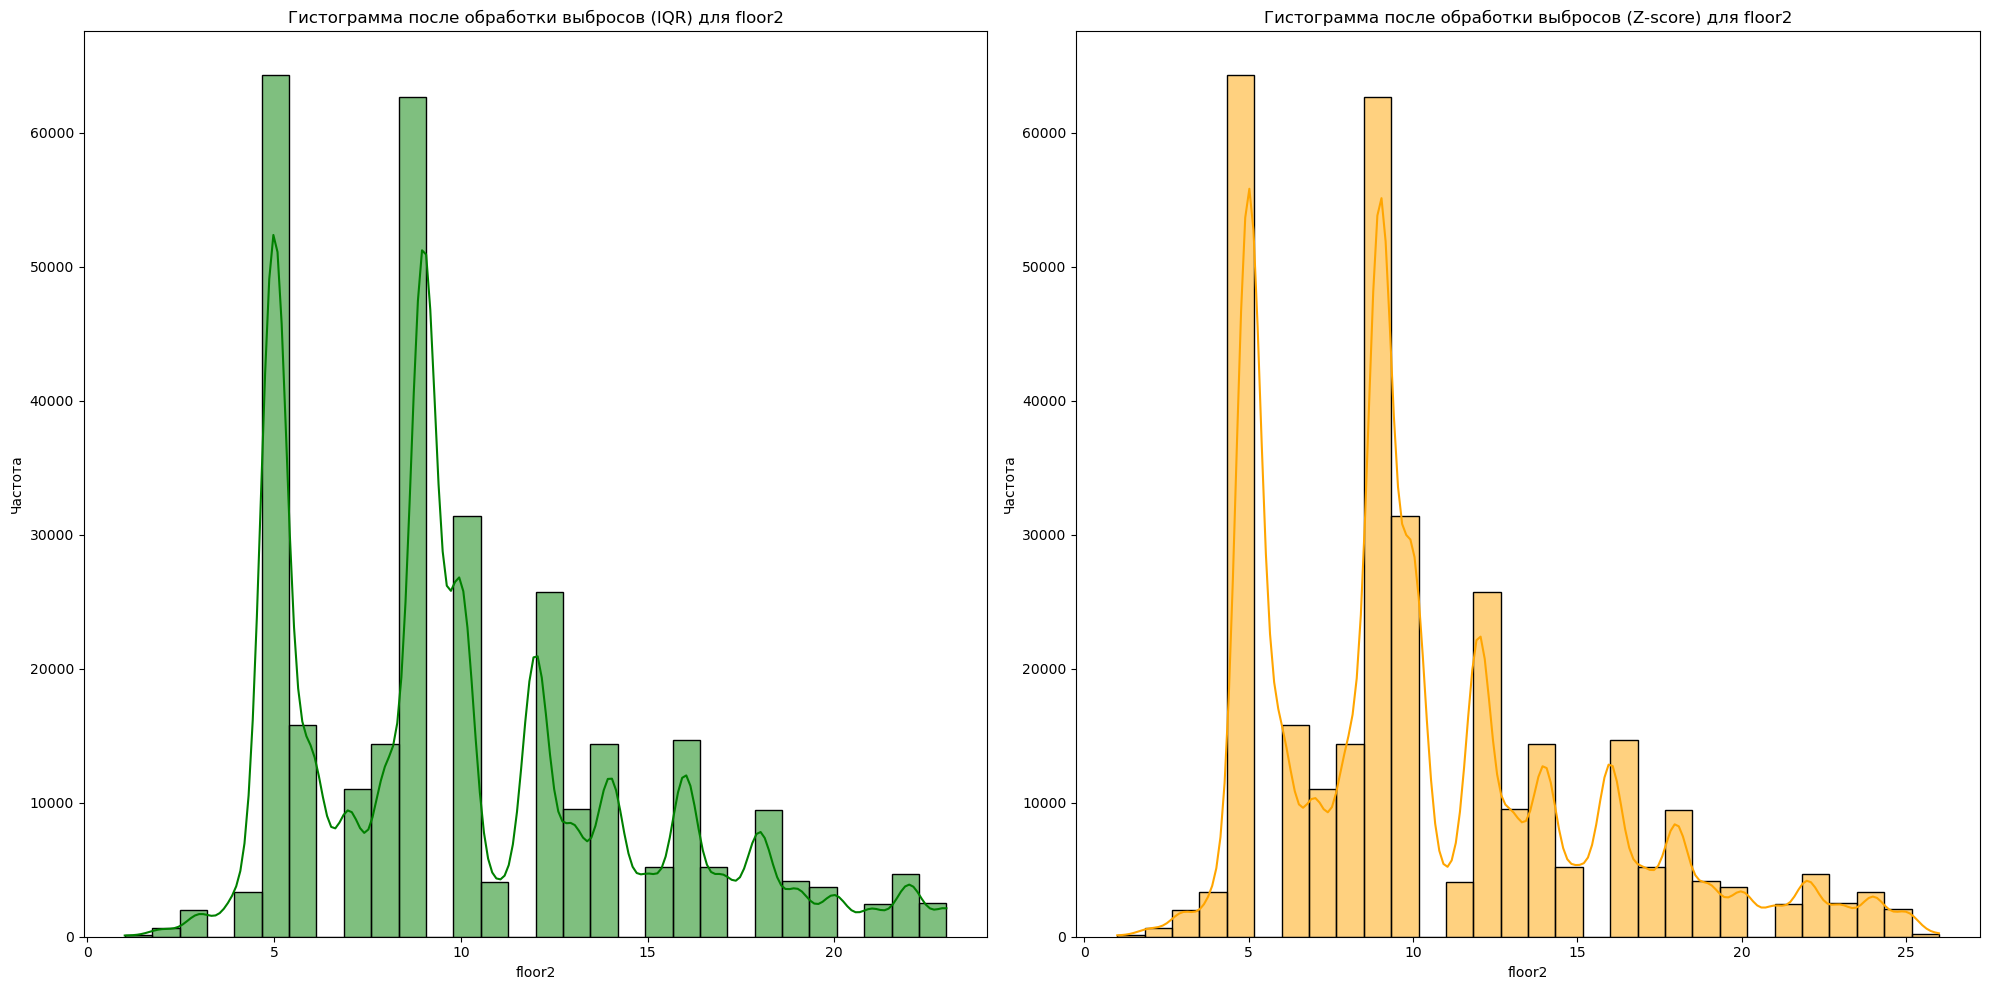

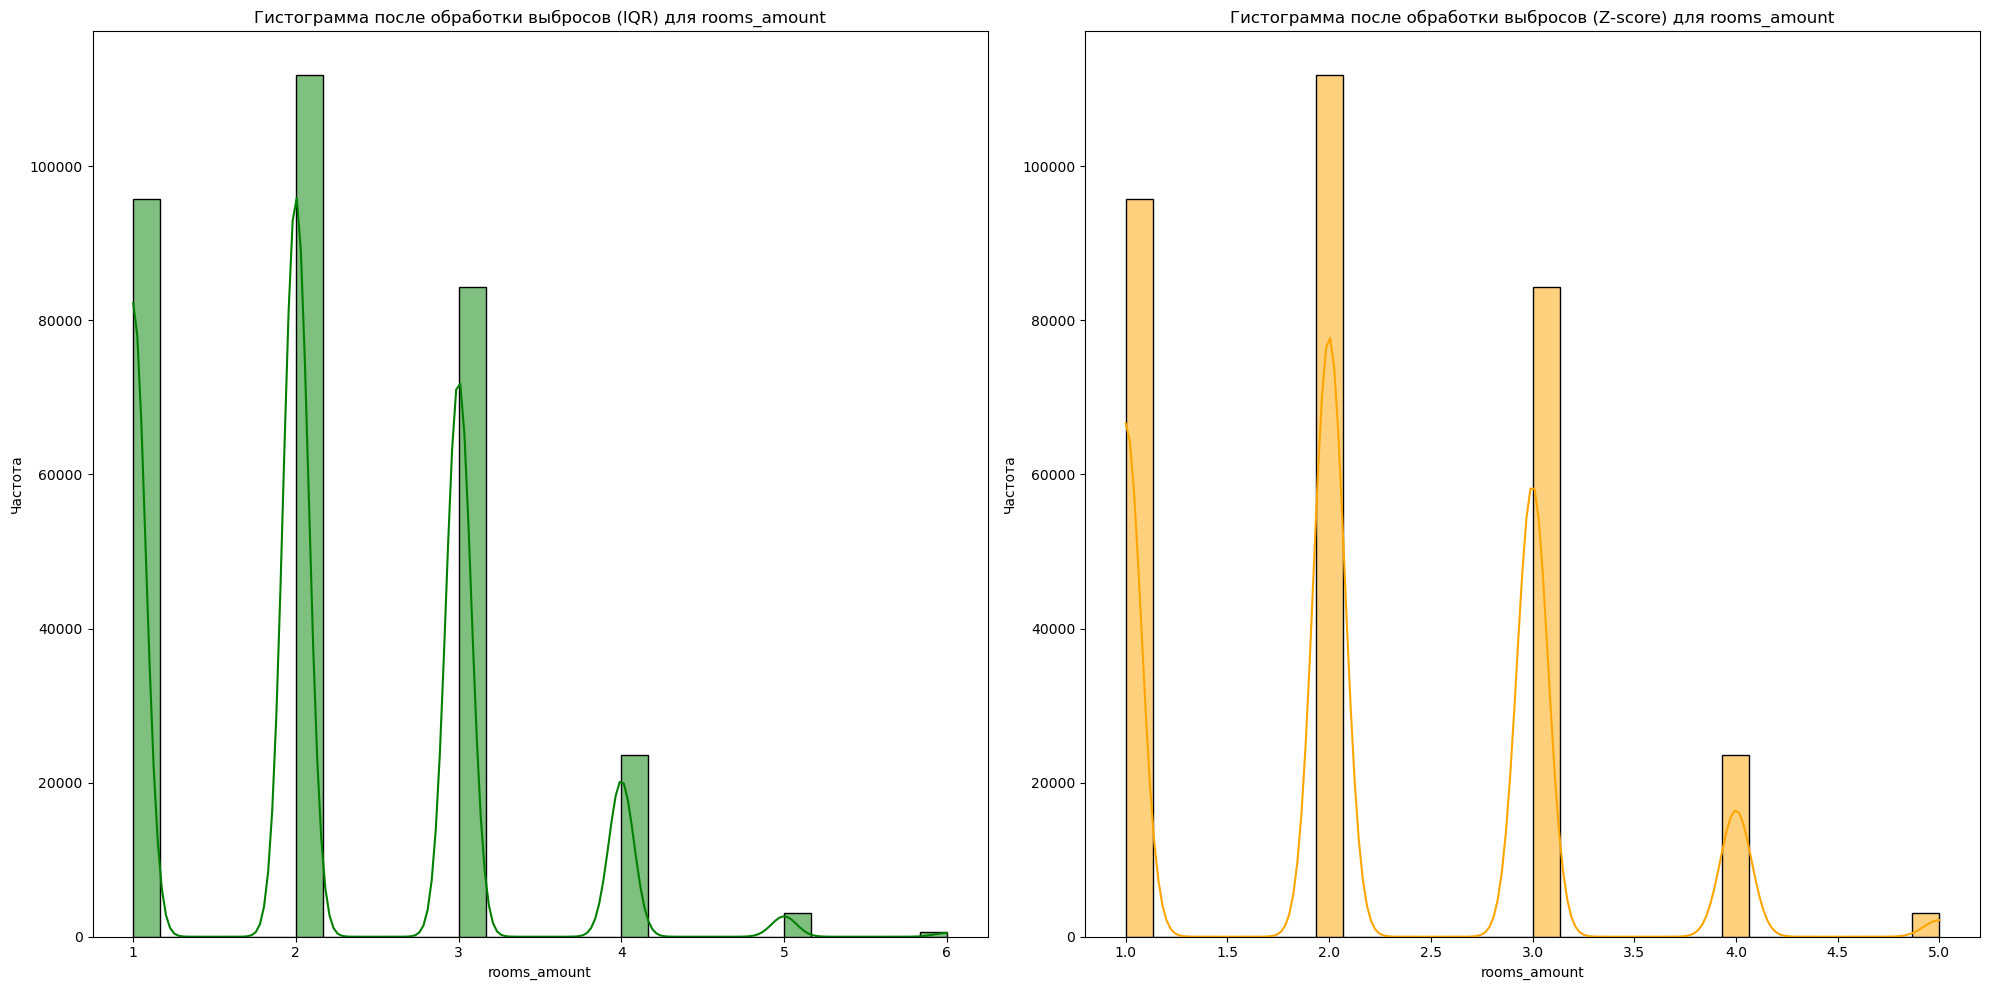

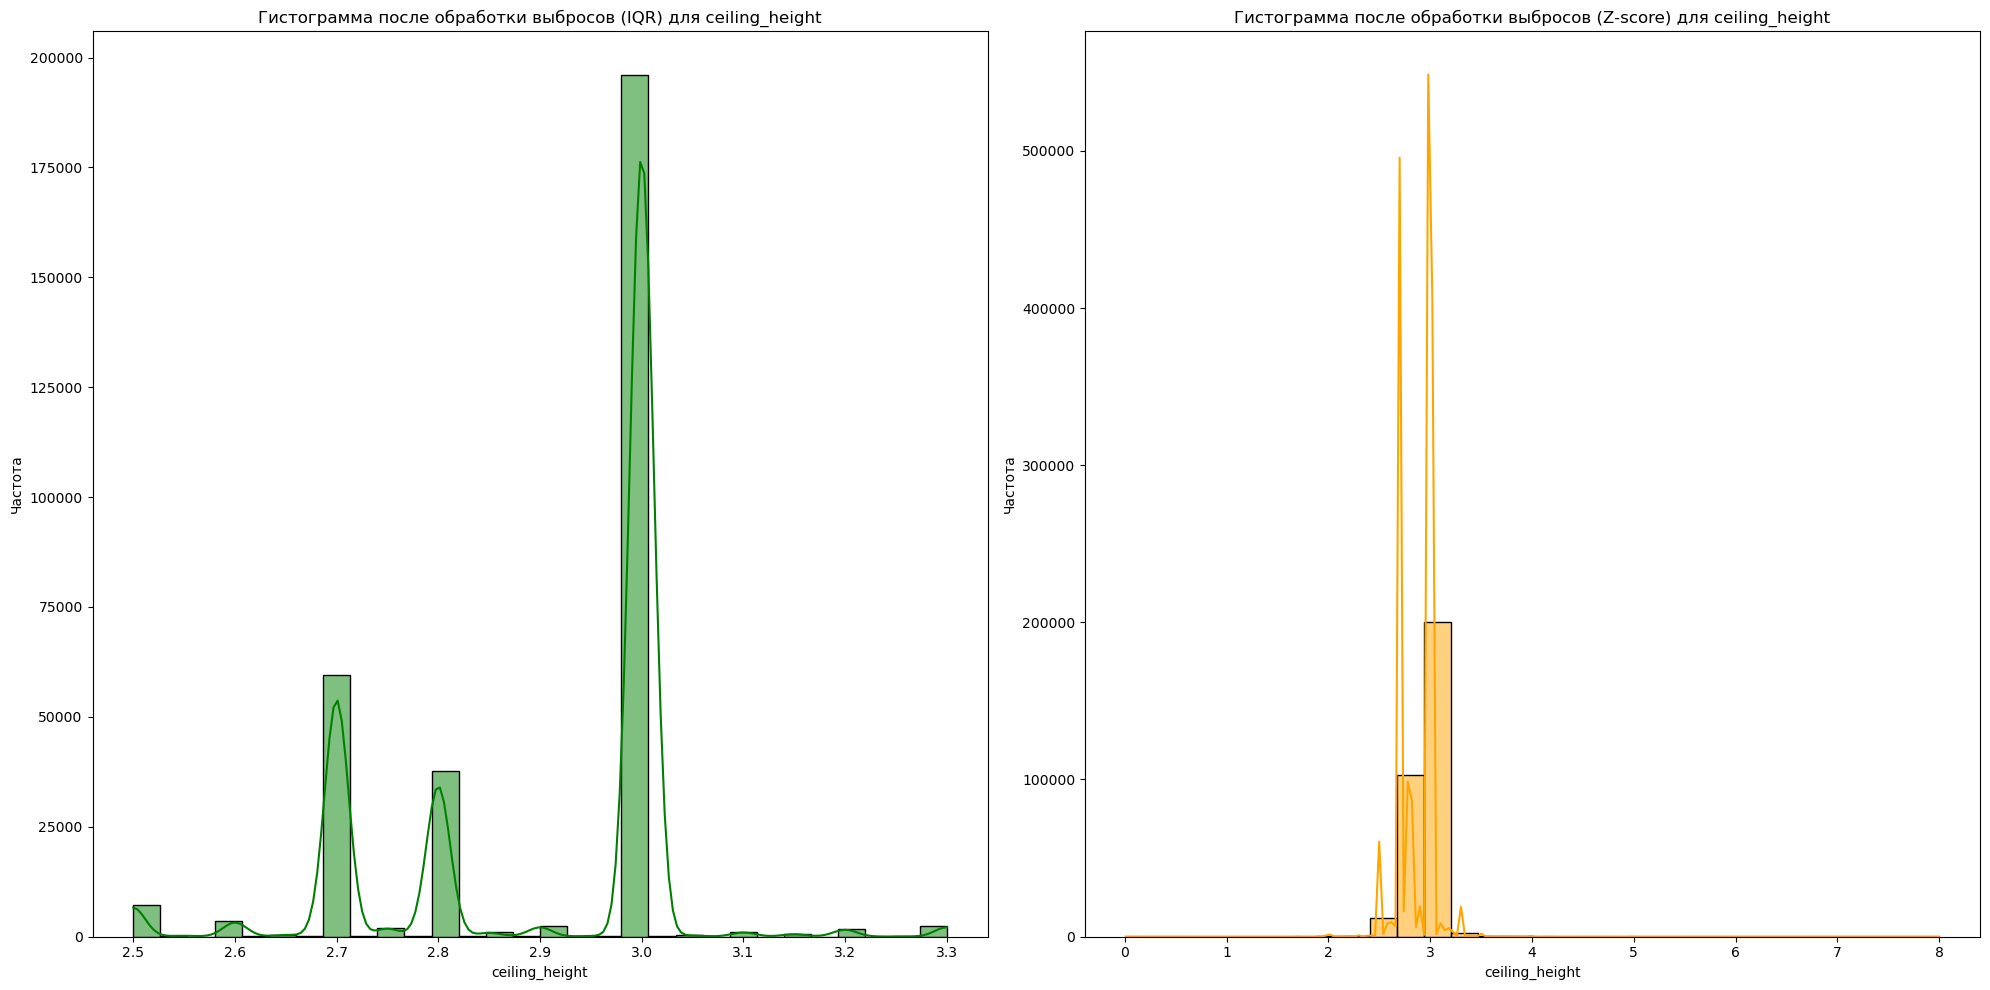

In [32]:
from scipy import stats

def find_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    return (data < lower_bound) | (data > upper_bound)

def find_outliers_zscore(data, threshold=3):## отправляем маску
    z_scores = np.abs(stats.zscore(data))
    return z_scores > threshold

for column in ['area', 'views', 'phone_views', 'price', 'floor1', 'floor2', 'rooms_amount', 'ceiling_height']:
    outliers_iqr = find_outliers_iqr(df_new[column])
    df_processed = df_new[~outliers_iqr]  # Удаление выбросов

    outliers_zscore = find_outliers_zscore(df_new[column])
    df_processed_zscore = df_new[~outliers_zscore] 

    fig, axes = plt.subplots(1, 2, figsize=(20, 10))

    sns.histplot(df_processed[column], kde=True, ax=axes[0], color='green', bins=30)
    axes[0].set_title(f'Гистограмма после обработки выбросов (IQR) для {column}')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Частота')

    sns.histplot(df_processed_zscore[column], kde=True, ax=axes[1], color='orange', bins=30)
    axes[1].set_title(f'Гистограмма после обработки выбросов (Z-score) для {column}')
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('Частота')

    plt.tight_layout()
    plt.show()

## Correlation Analysis

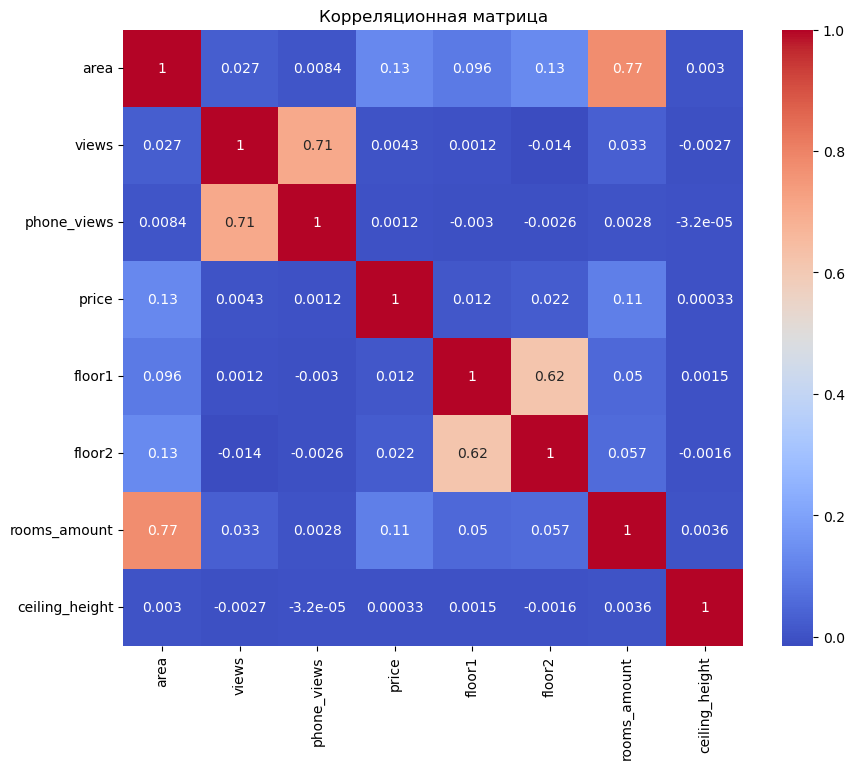

In [33]:
correlation = df_new[['area', 'views', 'phone_views', 'price', 'floor1', 
                      'floor2', 'rooms_amount', 'ceiling_height']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

## [Video Comment](URL)